# **Ejemplo 3:** Determinación de outliers
---

Generamos una muestra de una población normal e introducimos dos outliers, uno teniendo un valor muy pequeño y otro muy grande

In [2]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Tratamiento estadístico
# ==============================================================================
import scipy.stats as st

# Generación de datos
# ==============================================================================
mu, sigma = 50, 10 # media y desviación típica de la población

# Generamos una muestra de tamaño 100
datos = np.random.normal(mu, sigma, 100)
# Cambiamos los valores de dos datos para convertirlos en outliers
datos[50] = 100
datos[75] = 1
datos

array([ 52.4475476 ,  58.87806731,  56.11970355,  62.33523378,
        61.00279495,  38.56534599,  41.37184771,  53.68411377,
        40.69723387,  39.09167784,  51.68280309,  41.42475018,
        44.94323841,  53.72716339,  61.77420449,  34.50759696,
        50.89353968,  59.09024123,  57.99281847,  54.25466402,
        46.83544804,  65.67950338,  38.57953907,  56.51016265,
        58.43121424,  46.14825305,  38.25272802,  65.92233407,
        53.48599184,  30.71591348,  51.69481774,  56.76177433,
        49.61657856,  59.712228  ,  47.18343161,  52.95922896,
        51.74105206,  40.06129744,  46.01767981,  59.51534781,
        68.38653998,  47.63333642,  37.98710443,  48.41100785,
        37.46524562,  45.74774406,  54.76710675,  59.0457974 ,
        56.58449606,  48.03697615, 100.        ,  70.61687805,
        50.40540723,  54.63482124,  46.21095712,  40.76572995,
        57.25519379,  55.79563585,  58.97854171,  55.1459992 ,
        51.45612347,  33.50716764,  57.53597044,  46.77

**MÉTODO 1:** Construcción de las bandas al 95% para detección de outlierS

In [4]:
# CRITERIO 1: PROBABILIDAD GLOBAL

# probabilidad de la muestra de estar dentro de las bandas
p_g = 0.95
# probabilidad global de una cola
alfa_g = (1-p_g)/2
# probabilidad  de las colas para un solo dato
alfa = 1-(1-alfa_g)**(1/len(datos))

## CRITERIO 2:  Criterio Chauvenet

alfa = 1/(2*len(datos))
Z_alfa = st.norm.ppf(1-alfa/2)

# Impresión de resultados

alfa = round(alfa, 5)
Z_alfa = round(Z_alfa, 5)
print(f" Alfa = {alfa}")
print(f" CUANTIL Z_(1-alfa/2) = {Z_alfa}")

 Alfa = 0.005
 CUANTIL Z_(1-alfa/2) = 2.80703


Cálculo de bandas

In [6]:
xL = np.mean(datos) - Z_alfa * np.std(datos)
xU = np.mean(datos) + Z_alfa * np.std(datos)
print(f" Banda = [{xL}, {xU}]")

 Banda = [19.77203083937762, 82.93546483597254]


In [7]:
for i in range(len(datos)):
    if datos[i] < xL  or datos[i] > xU:
        print(f" El dato[{i}]={datos[i]} es un outlier")

 El dato[50]=100.0 es un outlier
 El dato[75]=1.0 es un outlier


¿Qué hubiera ocurrido si **no** se hubiera efectuado la corrección de la probabilidad global?


**MÉTODO 2:**  Basado en la distancia entre cuartiles

In [9]:
Q1 = np.quantile(datos, 0.25)
Q3 = np.quantile(datos, 0.75)
IQR = Q3 - Q1
k = 1.5
xL = Q1 - k * IQR
xU = Q3 + k * IQR
print(f"Bandas: [{xL}, {xU}]")
for i in  range(len(datos)):
    if datos[i] < xL  or datos[i]>xU:
        print(f" El dato[{i}]={datos[i]} es un outlier")

Bandas: [29.105085185417405, 74.46648399725134]
 El dato[50]=100.0 es un outlier
 El dato[72]=27.652130869291355 es un outlier
 El dato[75]=1.0 es un outlier
 El dato[86]=74.7778204142998 es un outlier


**Métodos Gráficos**: Boxplots

Los *boxplots* (diagramas de caja) utilizan los cuartiles y el rango intercuartiles (IQR) para visualizar la distribución de los datos.

Un boxplot muestra el cuartil medio (la mediana), los cuartiles superior e inferior, y los *bigotes* que suelen extenderse hasta 1.5 veces el rango intercuartílico desde la caja. Cualquier dato fuera de estos *bigotes* se considera un outlier y se dibuja como un punto independiente.

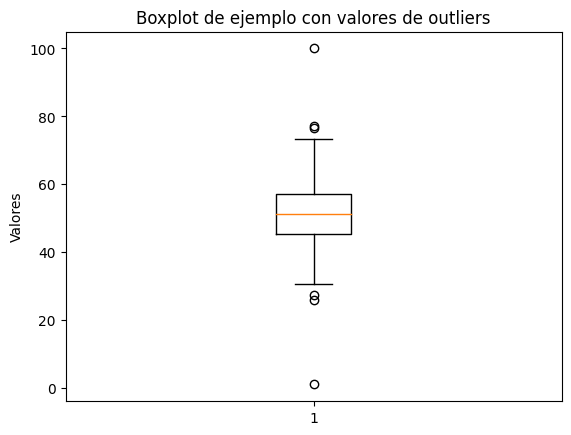

In [ ]:
import matplotlib.pyplot as plt

# Crear el boxplot
plt.boxplot(datos)

# Añadir título y etiquetas si es necesario
plt.title('Boxplot de ejemplo con valores de outliers')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()